EDA:

Let's begin by importing the necessary libraries and loading the dataset. Since our dataset is massive, and has grown by almost a third in just the last 2 years, let's create a subset of the data to work with. Let's analyze the data from 2020 onwards for a more manageable dataset and to observe Covid-19's impact on the liquor sales. We start by filtering the data for dates from 2020 onwards and implementing an multi index structure to optimize performance for our product and time series analysis. This is a one time operation, since loading the original dataset is time consuming, so we will save the output as a parquet file and start our EDA on the parquet file.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import eda_utils as eda

##################################################################################################
#                                                                                                #
# #Commenting out one time operation                                                             #
#                                                                                                #
# # Load the dataset with low_memory=False to handle mixed types                                 #
# liquor_sales = pd.read_csv('Iowa_Liquor_Sales.csv', low_memory=False)                          #
#                                                                                                #
# # Convert Date and create filtered copy                                                        #
# liquor_sales['Date'] = pd.to_datetime(liquor_sales['Date'])                                    #
# filtered_df = liquor_sales[liquor_sales['Date'].dt.year >= 2020].copy()                        #
#                                                                                                #
# # Handle the Zip Code column specifically                                                      #
# filtered_df['Zip Code'] = filtered_df['Zip Code'].astype(str)                                  #
#                                                                                                #
# # Sort values first for better performance                                                     #
# filtered_df_sorted = filtered_df.sort_values(['Date', 'Item Number', 'Store Number'])          #
#                                                                                                #
# # Create multi-index structure optimized for product analysis                                  #
# filtered_df_indexed = filtered_df_sorted.set_index(['Date', 'Item Number', 'Store Number'])    #
#                                                                                                #
# # Export to parquet with optimized settings                                                    #
# output_filename = 'iowa_liquor_sales_2020_onwards.parquet'                                     #
# filtered_df_indexed.to_parquet(                                                                #
#     output_filename,                                                                           #
#     engine='pyarrow',                                                                          #
#     compression='snappy'                                                                       #
# )                                                                                              #
#                                                                                                #
##################################################################################################

Now that we have our lightweight Parquet formatted dataset, we can start to explore the data. 

In [3]:
liquor_sales = pd.read_parquet('data/iowa_liquor_sales_2020_onwards.parquet')

liquor_sales.head()


Invoice/Item Number  \
Date       Item Number Store Number                       
2020-01-02 10006       2611             INV-24307100006   
                       2684             INV-24299400032   
                       4234             INV-24310500037   
           10008       2500             INV-24290800008   
                       2556             INV-24299900002   

                                                                Store Name  \
Date       Item Number Store Number                                          
2020-01-02 10006       2611                     HY-VEE DRUGSTORE / OTTUMWA   
                       2684                           HY-VEE - FOREST CITY   
                       4234                  FAREWAY STORES #788 / SPENCER   
           10008       2500                    HY-VEE FOOD STORE #1 / AMES   
                       2556          HY-VEE WINE AND SPIRITS / ESTHERVILLE   

                                                     Address         City  \
Date       Item Number Store Number                                         
2020-01-02 10006       2611          1140 NORTH JEFFERSON ST      OTTUMWA   
                       2684                 315 HWY 69 NORTH  FOREST CITY   
                       4234                  104 E EIGHTH ST      SPENCER   
           10008       2500               3800 W LINCOLN WAY         AMES   
                       2556              1033 CENTRAL AVENUE  ESTHERVILLE   

                                    Zip Code  \
Date       Item Number Store Number            
2020-01-02 10006       2611            52501   
                       2684            50436   
                       4234            51301   
           10008       2500            50010   
                       2556            51334   

                                                            Store Location  \
Date       Item Number Store Number                                          
2020-01-02 10006       2611          POINT (-92.401538 41.026754000000004)   
                       2684                    POINT (-93.63235 43.266826)   
                       4234                   POINT (-95.143388 43.145797)   
           10008       2500                                           None   
                       2556                   POINT (-94.829962 43.402096)   

                                     County Number     County   Category  \
Date       Item Number Store Number                                        
2020-01-02 10006       2611                   90.0    WAPELLO  1012200.0   
                       2684                   95.0  WINNEBAGO  1012200.0   
                       4234                   21.0       CLAY  1012200.0   
           10008       2500                   85.0      STORY  1012200.0   
                       2556                   32.0      EMMET  1012200.0   

                                       Category Name  ...  \
Date       Item Number Store Number                   ...   
2020-01-02 10006       2611          SCOTCH WHISKIES  ...   
                       2684          SCOTCH WHISKIES  ...   
                       4234          SCOTCH WHISKIES  ...   
           10008       2500          SCOTCH WHISKIES  ...   
                       2556          SCOTCH WHISKIES  ...   

                                              Vendor Name  \
Date       Item Number Store Number                         
2020-01-02 10006       2611          SAZERAC COMPANY  INC   
                       2684          SAZERAC COMPANY  INC   
                       4234          SAZERAC COMPANY  INC   
           10008       2500          SAZERAC COMPANY  INC   
                       2556          SAZERAC COMPANY  INC   

                                         Item Description Pack  \
Date       Item Number Store Number                              
2020-01-02 10006       2611          SCORESBY RARE SCOTCH   12   
                       2684          SCORESBY RARE SCOTCH   12  

In [4]:
liquor_sales.shape

(13032174, 21)

In [5]:
liquor_sales.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 13032174 entries, (Timestamp('2020-01-02 00:00:00'), '10006', 2611) to (Timestamp('2024-12-31 00:00:00'), '994876', 10003)
Data columns (total 21 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Invoice/Item Number    object 
 1   Store Name             object 
 2   Address                object 
 3   City                   object 
 4   Zip Code               object 
 5   Store Location         object 
 6   County Number          float64
 7   County                 object 
 8   Category               float64
 9   Category Name          object 
 10  Vendor Number          float64
 11  Vendor Name            object 
 12  Item Description       object 
 13  Pack                   int64  
 14  Bottle Volume (ml)     int64  
 15  State Bottle Cost      float64
 16  State Bottle Retail    float64
 17  Bottles Sold           int64  
 18  Sale (Dollars)         float64
 19  Volume Sold (Liters)   float64
 2

Let's see how many cities are in the dataset, along with the cities that have the most transactions.

In [12]:
print(liquor_sales['City'].nunique())
liquor_sales['City'].value_counts()


478


City
DES MOINES         1058900
CEDAR RAPIDS        839345
DAVENPORT           526598
WEST DES MOINES     428525
WATERLOO            383047
                    ...   
WAYLAND                 50
BADGER                  49
IRWIN                   49
MANILLA                 35
DUNCOMBE                 6
Name: count, Length: 478, dtype: int64

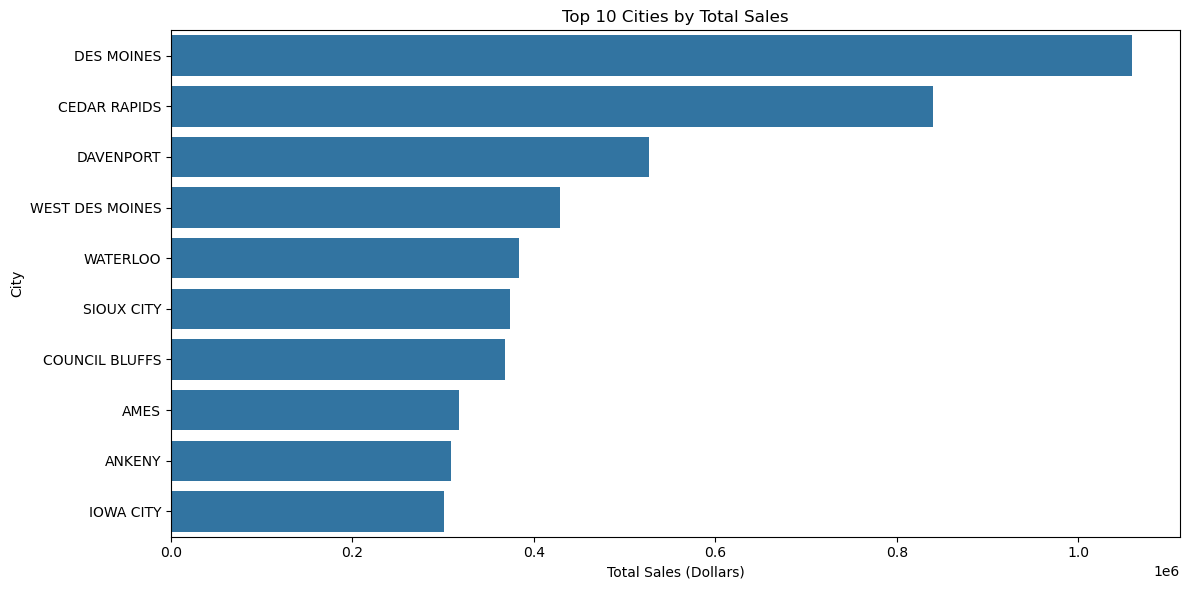

In [14]:
eda.bar_plot_top_10(
    data=liquor_sales,
    group_by_col='City',
    value_col='Sale (Dollars)',
    title='Top 10 Cities by Total Sales',
    xlabel='Total Sales (Dollars)',
    agg_func='count'
)

Seems like Des Moines has the most transactions, so let's see how many liquor stores are in Des Moines.




In [7]:
print(liquor_sales.reset_index().query("City == 'DES MOINES'")['Store Number'].nunique())


100


Does this mean that Des Moines has the most liquor stores in Iowa? Let's find out.


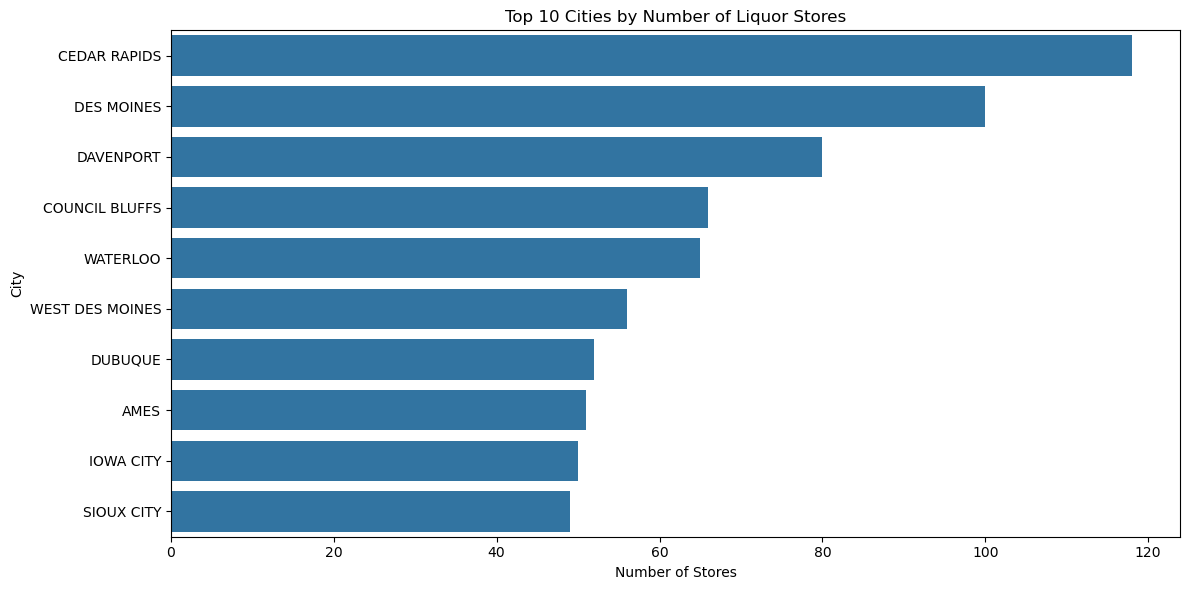

In [8]:

eda.bar_plot_top_10(
    data=liquor_sales,
    group_by_col='City',
    value_col='Store Number',
    title='Top 10 Cities by Number of Liquor Stores',
    xlabel='Number of Stores',
    agg_func='nunique'
)

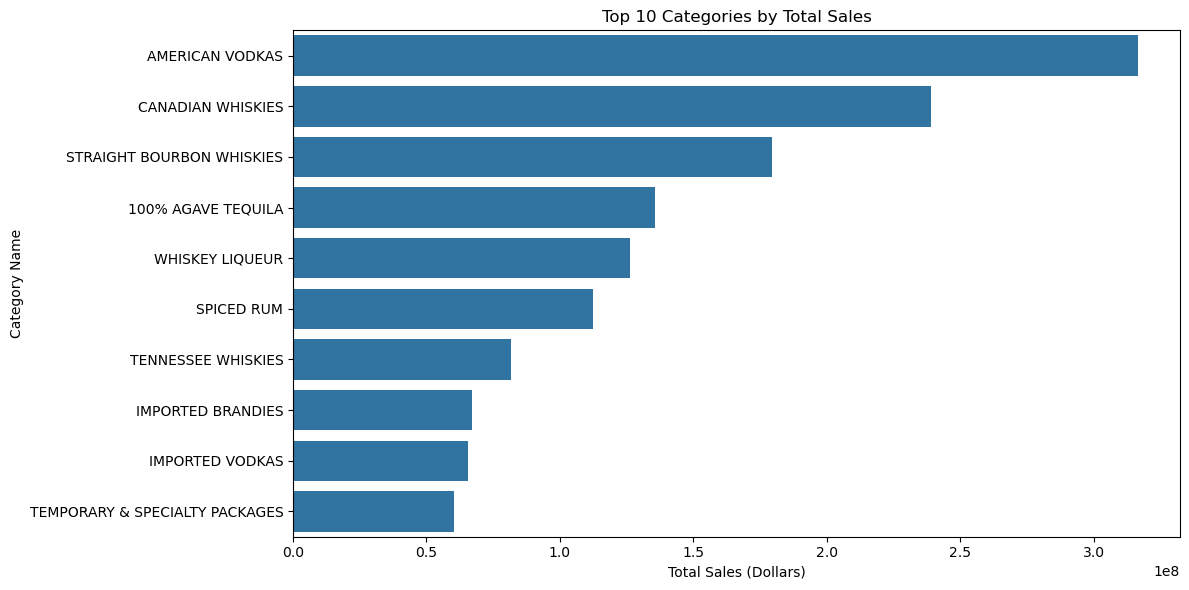

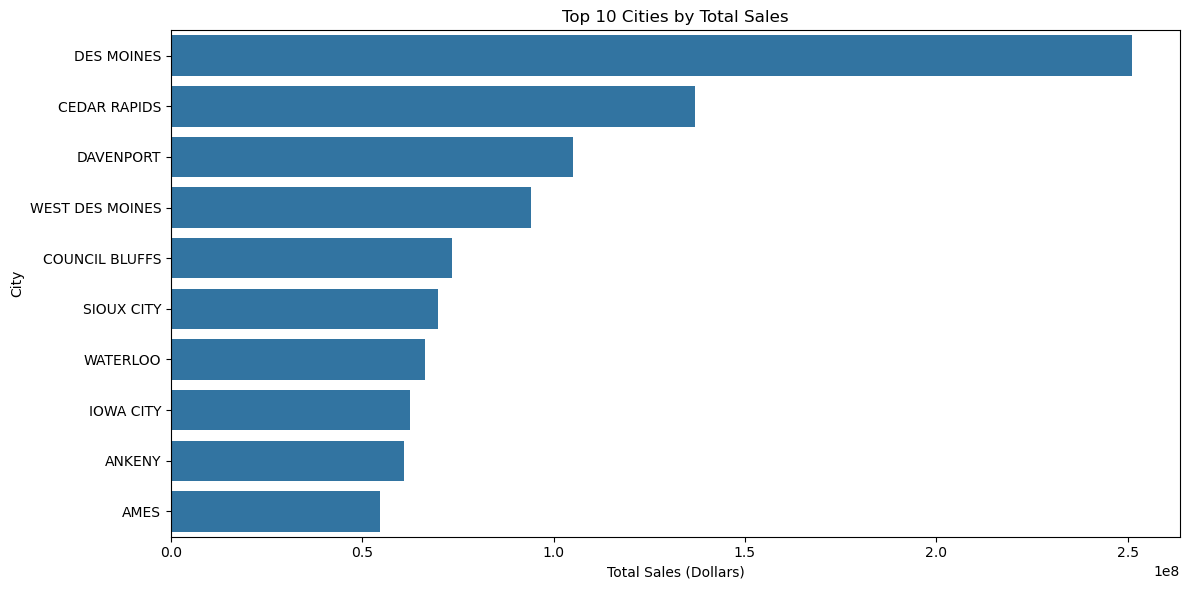

In [9]:




# # 1. Monthly Sales Trend
# monthly_sales = (liquor_sales
#                 .groupby(pd.Grouper(level='Date', freq='M'))['Sale (Dollars)']
#                 .sum()
#                 .reset_index())
# monthly_sales['Date'] = monthly_sales['Date'].dt.strftime('%Y-%m')  # Format date as string

# plt.figure(figsize=(15, 6))
# plt.plot(monthly_sales['Date'], monthly_sales['Sale (Dollars)'], marker='o')
# plt.xticks(rotation=45, ha='right')
# plt.title('Monthly Sales Trend (2020 onwards)')
# plt.xlabel('Date')
# plt.ylabel('Total Sales (Dollars)')
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()


# 2. Top 10 Categories by Sales
eda.bar_plot_top_10(
    data=liquor_sales,
    group_by_col='Category Name',
    value_col='Sale (Dollars)',
    title='Top 10 Categories by Total Sales',
    xlabel='Total Sales (Dollars)'
)

eda.bar_plot_top_10(
    data=liquor_sales,
    group_by_col='City',
    value_col='Sale (Dollars)',
    title='Top 10 Cities by Total Sales',
    xlabel='Total Sales (Dollars)'
)



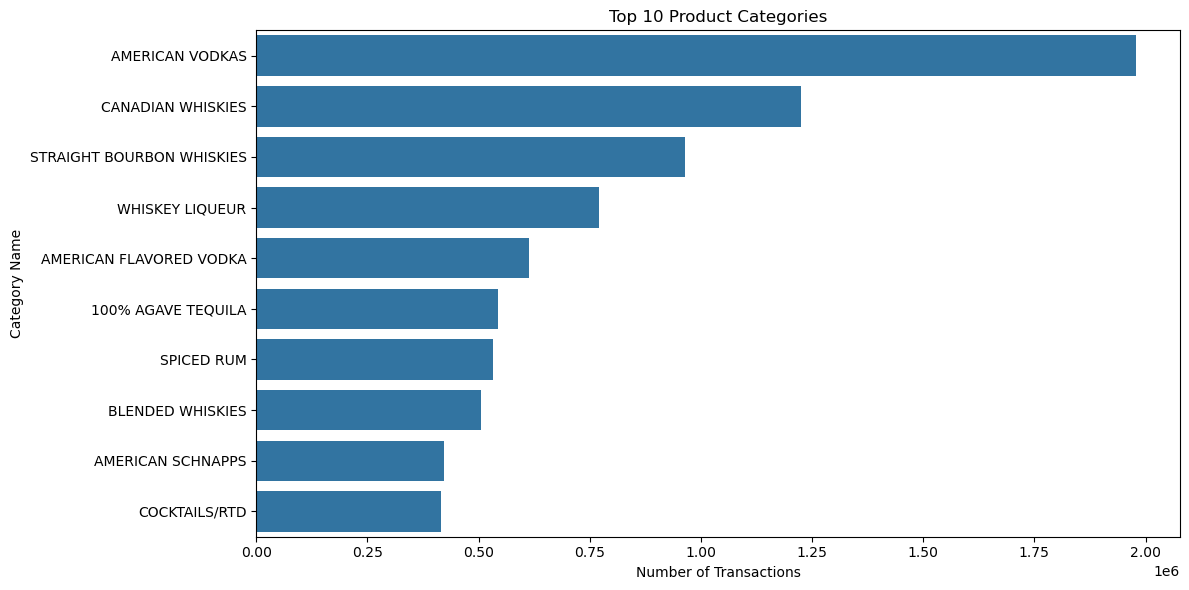

Total unique categories: 50
Top 10 Categories and their transaction counts:
Category Name
AMERICAN VODKAS              1978448
CANADIAN WHISKIES            1224386
STRAIGHT BOURBON WHISKIES     964827
WHISKEY LIQUEUR               770717
AMERICAN FLAVORED VODKA       614266
100% AGAVE TEQUILA            543098
SPICED RUM                    532598
BLENDED WHISKIES              505739
AMERICAN SCHNAPPS             422633
COCKTAILS/RTD                 415606
Name: count, dtype: int64


In [10]:
category_counts = liquor_sales['Category Name'].value_counts()
top_10_categories = category_counts.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_categories.values, y=top_10_categories.index)
plt.title('Top 10 Product Categories')
plt.xlabel('Number of Transactions')
plt.tight_layout()
plt.show()

# Print summary statistics
print("\
Total unique categories:", len(category_counts))
print("\
Top 10 Categories and their transaction counts:")
print(top_10_categories)